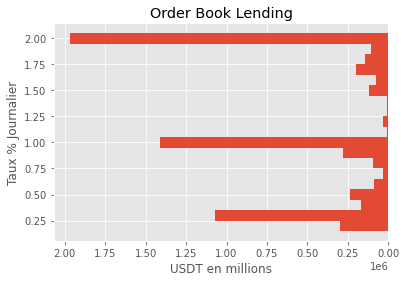

In [10]:
import ccxt
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# CCXT CONNECTION
# Auth not needed 
exchange = ccxt.kucoin({
"apiKey": "nope",
"secret": 'nope',
"password": "nope",
'enableRateLimit': True,
})

# GET ORDERBOOK
res = exchange.private_get_margin_market({'currency': 'USDT'})
df = pd.DataFrame(res['data'])

# ORDER BOOK DATAFRAME
df['daily_rate'] = df['dailyIntRate'].astype(float)
df['daily_rate'] = round(df['daily_rate']*100,1)
df['size'] = df['size'].astype(float)

# AGREGATION par daily_rate
df_gr =df.groupby(['daily_rate']).agg({'size':'sum'})
df_gr.reset_index(inplace=True)


#plot
fig,ax = plt.subplots(1)
ax.barh(df_gr.daily_rate, width=df_gr['size'], height=0.1)
ax.invert_xaxis()
plt.title('Order Book Lending')
plt.xlabel('USDT en millions')
plt.ylabel('Taux % Journalier')
fig.show()